Mean Absolute Error: 0.06
Mean Squared Error: 0.01
R^2 Score: 0.79


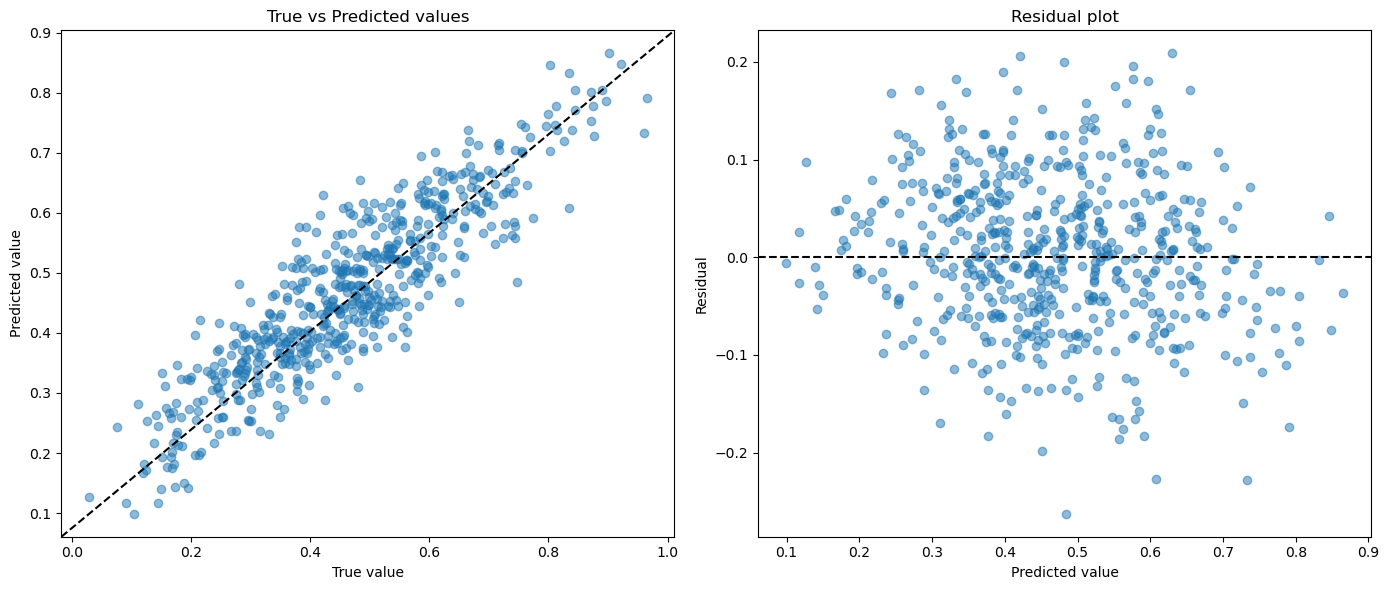

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# 데이터 불러오기
data_path = 'only_daily.csv'
data = pd.read_csv(data_path)

# 수치형 데이터 추출
numeric_data = data.select_dtypes(include=[np.number])

# Min-Max 스케일러 초기화
scaler_mm = MinMaxScaler()

# 스케일링 적용
data_mm_scaled = scaler_mm.fit_transform(numeric_data)

# 스케일링된 데이터를 DataFrame으로 변환
data_mm_scaled = pd.DataFrame(data_mm_scaled, columns=numeric_data.columns)

# 스케일링된 데이터를 새 CSV 파일로 저장
scaled_data_path = 'data_mm_scaled.csv'
data_mm_scaled.to_csv(scaled_data_path, index=False)

# 데이터를 특성과 목표 변수로 분할
X = data_mm_scaled.iloc[:, :-1]  # 모든 행과 마지막 열을 제외한 모든 열
y = data_mm_scaled.iloc[:, -1]   # 모든 행과 마지막 열

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 초기화
rf_model = RandomForestRegressor(random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
predictions = rf_model.predict(X_test)

# 모델 평가
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# 결과 출력
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# 시각화
plt.figure(figsize=(14, 6))

# 실제 값과 예측 값의 관계 그래프
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs Predicted values')

# 잔차 그래프
plt.subplot(1, 2, 2)
plt.scatter(predictions, predictions - y_test, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Residual plot')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 스케일링된 데이터 불러오기
scaled_data_path = 'data_mm_scaled.csv'
data_mm_scaled = pd.read_csv(scaled_data_path)

# 데이터를 특성과 목표 변수로 분할
X = data_mm_scaled.iloc[:, :-1]  # 모든 행과 마지막 열을 제외한 모든 열
y = data_mm_scaled.iloc[:, -1]   # 모든 행과 마지막 열

# 데이터를 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 초기화
rf_model = RandomForestRegressor(random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 예측
predictions = rf_model.predict(X_test)

# 모델 평가: MAE, MSE, R^2 스코어 계산
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# 결과 출력
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# 시각화
plt.figure(figsize=(14, 6))

# 실제 값과 예측 값의 관계 그래프
plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title('True vs Predicted values')

# 잔차 그래프
plt.subplot(1, 2, 2)
plt.scatter(predictions, predictions - y_test, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted value')
plt.ylabel('Residual')
plt.title('Residual plot')

plt.tight_layout()
plt.show()
